# Tutorial de Pandas

In [ ]:
df = pd.DataFrame({'name':['Bob','Jen','Tim'],
                   'age':[20,30,40],
                   'pet':['cat', 'dog', 'bird']})

print(df)

  name  age   pet
0  Bob   20   cat
1  Jen   30   dog
2  Tim   40  bird


In [ ]:
print(df.columns)
print(df.index)

print(df['name'])
print(df.name)

Index(['name', 'age', 'pet'], dtype='object')
RangeIndex(start=0, stop=3, step=1)
0    Bob
1    Jen
2    Tim
Name: name, dtype: object
0    Bob
1    Jen
2    Tim
Name: name, dtype: object


# Ejercicio de Tarea PANDAS

Ejercicio en el cual se usan algunas funciones básicas de PANDAS y la libreria maplotlib

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessicali9530/animal-crossing-new-horizons-nookplaza-dataset")

print("Path to dataset files:", path)

100%|██████████| 577k/577k [00:00<00:00, 81.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/jessicali9530/animal-crossing-new-horizons-nookplaza-dataset/versions/3


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# The data I will use
df=pd.read_csv(path+"/accessories.csv")
df.head(4).T

,0,1,2,3
Name,3D glasses,3D glasses,bandage,beak
Variation,White,Black,Beige,Yellow
DIY,No,No,No,No
Buy,490,490,140,490
Sell,122,122,35,122
Color 1,White,Black,Beige,Yellow
Color 2,Colorful,Colorful,White,Yellow
Size,1x1,1x1,1x1,1x1
Miles Price,NaN,NaN,NaN,NaN
Source,Able Sisters,Able Sisters,Able Sisters,Able Sisters


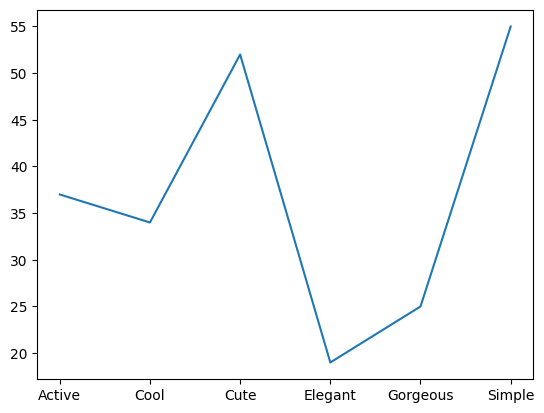

In [ ]:
style=df.groupby(["Style"]).count()["Unique Entry ID"]
plt.plot(style.index,style.values)
plt.show()

F


Educational level

```
# education=['primaria','basica',pregrado','postgrado']
```

Is Student

```
estudent=[0,1]
```

City of birth

```
# city=['Bogotá','Medellín','Teheran']
```

Temperature

```
# temperature=[0.3,1.5,2.6,30.6,40.5]
```

Area code

```
# zip_code=['0001','2312','5698']
```

favorite sport

```
# sports=['soccer','baseball','basketball','bowling']
```







